In [105]:
import psutil

# Получаем информацию о загрузке каждого ядра процессора
cpu_percentages = psutil.cpu_percent(percpu=True)

# Выводим информацию
for i, percentage in enumerate(cpu_percentages):
    print(f"Ядро {i}: {percentage}%")


Ядро 0: 29.4%
Ядро 1: 32.0%
Ядро 2: 25.2%
Ядро 3: 25.1%


In [106]:
import numpy as np
import pandas as pd 

In [107]:
data = pd.read_csv("dirty_5min.csv")

In [108]:
data_copy = data.copy()

In [109]:
pd.set_option('display.max_rows', None)

# Теперь вывод будет полным
issues = data_copy[data_copy.columns[data_copy.isna().sum() > 0]]
print(issues.isna().sum().sort_values(ascending=False))

# Чтобы вернуть настройки обратно
pd.reset_option('display.max_rows')

emv_ma          239901
cmf             206885
adl             115162
swi              86802
emv              85002
mfi              85001
vrc              78548
cmo              52652
vhf              52652
cci              49564
wr               49507
uosc             38208
%D               22088
imi              20371
%K               19042
ko                  67
adxr                40
mi                  40
signal_line         33
posc                29
adx                 27
senkou_a            26
senkou_b            26
macd                25
prc                 25
co                  25
vch                 19
sd                  19
ma-simple           19
middle_band         19
upper_band          19
lower_band          19
+di                 14
rsi                 14
-di                 14
fosc                14
dx                  14
tsf                 13
lrs                 13
rvi                 13
lri                 13
mom                 12
tema                12
rmi        

In [110]:
too_much_nan = issues.columns[issues.isna().sum() >= 100000]
print(f"Columns with too much Nan: {too_much_nan}")

Columns with too much Nan: Index(['adl', 'cmf', 'emv_ma'], dtype='object')


In [111]:
data_copy = data_copy.drop(too_much_nan, axis=1)

In [112]:
interpolate_nan = data_copy[data_copy.columns[data_copy.isna().sum() <= 100000]].columns
print(f"Columns to be interpolated: {interpolate_nan}")

Columns to be interpolated: Index(['date', 'open', 'high', 'low', 'close', 'volume', 'middle_band',
       'upper_band', 'lower_band', 'co', 'cmo', 'cci', 'dpo', '+di', '-di',
       'dx', 'adx', 'adxr', 'dema', 'emv', 'rl_0.0', 'rl_23.6', 'rl_38.2',
       'rl_50.0', 'rl_61.8', 'rl_100.0', 'fosc', 'tenkan_sen', 'kijun_sen',
       'senkou_a', 'senkou_b', 'imi', 'ko', 'lri', 'lrs', 'mfi', 'mi', 'mp',
       'mom', 'ma-simple', 'macd', 'signal_line', 'nvi', 'obv', 'sar', 'prf',
       'target_LONG', 'pvi', 'pvt', 'highest_high', 'lowest_low', 'posc',
       'prc', 'qstick', 'ri', 'rmi', 'rsi', 'rvi', 'sd', 'smi', '%K', '%D',
       'swi', 'tsf', 'tema', 'tp', 'uosc', 'vhf', 'vch', 'vosc', 'vrc', 'wc',
       'ws', 'wad', 'wr', 'price_change', 'close_target'],
      dtype='object')


In [113]:
data_inter = data_copy.copy()

In [114]:
data_inter[interpolate_nan] = data_inter[interpolate_nan].interpolate(method="linear")

C:\Users\ANDREY\AppData\Local\Temp\ipykernel_10260\2639328916.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_inter[interpolate_nan] = data_inter[interpolate_nan].interpolate(method="linear")


In [115]:
data_inter.fillna(method='ffill', inplace=True)

C:\Users\ANDREY\AppData\Local\Temp\ipykernel_10260\3883407200.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_inter.fillna(method='ffill', inplace=True)


In [116]:
data_inter = data_inter.iloc[70:]

In [117]:
columns_to_delete = ['adl', 'cmf', 'emv_ma', 'emv', 'mfi', 'vrc']

In [118]:
data_inter.shape

(775355, 77)

In [119]:
data_inter = data_inter.drop(['emv', 'mfi', 'vrc'], axis=1)

In [120]:
data_inter.shape

(775355, 74)

In [121]:
data_inter.to_csv("clean_5min.csv", index=True)

<hr>

# Main part is over, additional material over

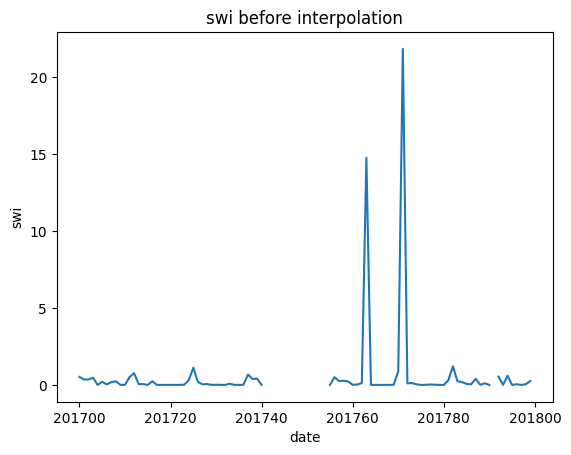

In [ ]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
data = data_copy.loc["2017-01-01":"2018-01-01"]
ax.plot(data.index, data["mfi"])


plt.title("swi before interpolation")
plt.xlabel("date")
plt.ylabel("swi")
#plt.savefig("coef_nan.jpg", dpi=400)
plt.show()

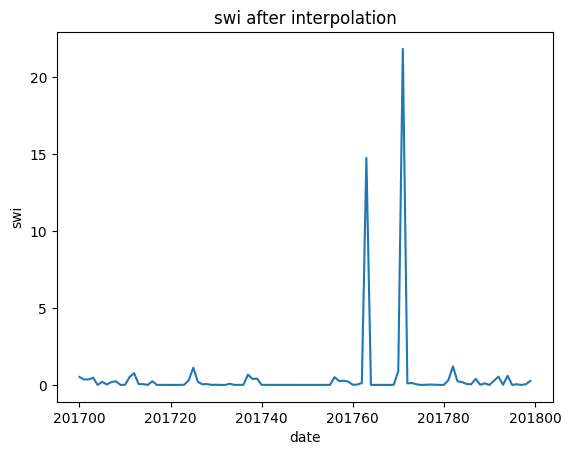

In [ ]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
data = data_inter.loc["2017-01-01":"2018-01-01"]
ax.plot(data.index, data["mfi"])
plt.title("swi after interpolation")
plt.xlabel("date")
plt.ylabel("swi")
#plt.savefig("coef_lin_inter.jpg", dpi=400)
plt.show()

In [ ]:
data_subset = data_inter.iloc[:, 1:]

data_subset[np.isinf(data_subset).any(axis=1)]

,open,high,low,close,volume,middle_band,upper_band,lower_band,co,cmo,...,vhf,vch,vosc,vrc,wc,ws,wad,wr,price_change,close_target
71,244.00,244.00,244.00,244.00,0.000000,244.4415,245.3681,243.5149,-1.1617,-100.0000,...,0.5000,-79.6453,0.0000,inf,244.0000,244.0829,0.00,-100.0000,0.000000,244.00
72,244.00,244.00,244.00,244.00,0.000000,244.3920,245.3017,243.4823,-1.1617,-100.0000,...,0.6000,-86.5569,0.0000,inf,244.0000,244.0663,0.00,-100.0000,0.000000,244.00
73,244.00,244.00,244.00,244.00,0.000000,244.3425,245.2240,243.4610,-1.1617,-100.0000,...,0.7000,-86.5569,0.0000,inf,244.0000,244.0530,0.00,-100.0000,0.000000,244.00
74,244.00,244.00,244.00,244.00,0.000000,244.2930,245.1337,243.4523,-1.1617,-100.0000,...,0.8000,-86.5569,0.0000,inf,244.0000,244.0424,0.00,-100.0000,0.000000,244.00
75,244.00,244.00,244.00,244.00,0.000000,244.2440,245.0314,243.4566,-1.1617,-100.0000,...,0.9000,-86.5569,0.0000,inf,244.0000,244.0339,0.00,-100.0000,0.000000,243.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773752,22089.47,22120.01,22089.47,22120.01,3.665769,22103.7385,22123.9497,22083.5273,0.6022,18.4584,...,0.5923,32.8205,0.6903,inf,22112.3750,22105.3098,30.54,-0.0000,0.001383,22097.39
773784,22138.18,22140.46,22135.71,22139.90,0.439904,22144.5375,22165.5830,22123.4920,0.1474,-7.6545,...,0.5383,7.6825,-0.1083,inf,22138.9925,22143.4058,4.19,-73.3575,0.000078,22134.26
774400,23778.20,23778.30,23768.82,23778.15,0.020461,23750.5120,23799.0495,23701.9745,-0.3191,30.3030,...,0.3478,-42.3369,-0.0195,inf,23775.8550,23763.0584,-0.15,-13.9657,-0.000002,23766.34
774674,24562.83,24570.99,24562.83,24566.98,0.000112,24567.5625,24605.1245,24530.0005,-0.0113,-15.4101,...,0.3525,-42.7301,0.0049,inf,24566.9450,24566.9540,4.15,-61.5301,0.000169,24563.57


In [ ]:
import numpy as np

# Проверяем, где есть Inf в DataFrame
inf_mask = np.isinf(data_subset)

# Находим столбцы, в которых есть хотя бы одно значение Inf
columns_with_inf = inf_mask.any(axis=0)

# Получаем имена столбцов с Inf
inf_columns = data_subset.columns[columns_with_inf].tolist()

print("Столбцы с Inf:", inf_columns)

Столбцы с Inf: ['emv', 'mfi', 'vrc']


In [ ]:
data_subset["vrc"].value_counts(ascending=True)

vrc
-48.5062         1
 287.3515        1
 23.3166         1
-29.2162         1
 219.7294        1
             ...  
 100.0000       76
-50.0000        90
 0.0000        243
-100.0000    32418
 inf         96632
Name: count, Length: 578889, dtype: int64

In [ ]:
pd.set_option('display.max_rows', None)

print(data_inter.dtypes)
# Чтобы вернуть настройки обратно
pd.reset_option('display.max_rows')

date             object
open            float64
high            float64
low             float64
close           float64
volume          float64
middle_band     float64
upper_band      float64
lower_band      float64
co              float64
cmo             float64
cci             float64
dpo             float64
+di             float64
-di             float64
dx              float64
adx             float64
adxr            float64
dema            float64
emv             float64
rl_0.0          float64
rl_23.6         float64
rl_38.2         float64
rl_50.0         float64
rl_61.8         float64
rl_100.0        float64
fosc            float64
tenkan_sen      float64
kijun_sen       float64
senkou_a        float64
senkou_b        float64
imi             float64
ko              float64
lri             float64
lrs             float64
mfi             float64
mi              float64
mp              float64
mom             float64
ma-simple       float64
macd            float64
signal_line     

In [ ]:
data_inter.sort_values(by="vhf", ascending = False)

,date,open,high,low,close,volume,middle_band,upper_band,lower_band,co,...,vhf,vch,vosc,vrc,wc,ws,wad,wr,price_change,close_target
123698,2016-12-11 01:55:00,766.44,766.44,766.44,766.44,0.000000,767.3795,771.3474,763.4116,-2.6749,...,1.0,-8.053930e+01,-0.8102,inf,766.4400,766.4443,0.00,-0.0000,0.000000,766.44
31691,2016-01-26 14:40:00,394.45,394.45,394.45,394.45,0.000000,395.4100,396.3249,394.4951,-1.4217,...,1.0,7.578100e+00,1.9963,inf,394.4500,394.9597,0.00,-100.0000,0.000000,394.45
31682,2016-01-26 13:55:00,395.59,395.59,395.59,395.59,0.000000,395.4120,397.2305,393.5935,5.2567,...,1.0,-5.117450e+01,0.1980,inf,395.5900,395.7227,0.00,-100.0000,0.000000,395.12
31683,2016-01-26 14:00:00,395.59,395.59,395.12,395.12,0.133146,395.5320,396.8800,394.1840,4.0567,...,1.0,-9.543000e-01,-0.0921,inf,395.2375,395.6021,-0.47,-100.0000,-0.001188,395.12
31684,2016-01-26 14:05:00,395.12,395.12,395.12,395.12,0.000000,395.6520,396.1123,395.1917,4.0567,...,1.0,-9.543000e-01,-0.0921,inf,395.1200,395.5057,0.00,-100.0000,0.000000,395.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135422,2017-01-20 18:55:00,897.04,897.04,897.04,897.04,15.351633,899.9985,904.6551,895.3419,-8.1518,...,0.0,-5.657840e+01,3.2565,502.0248,897.0400,897.8402,0.00,-20.0000,0.000000,897.03
135431,2017-01-20 19:40:00,897.05,897.05,897.05,897.05,0.382663,897.7100,900.5366,894.8834,-8.5501,...,0.0,-8.612670e+01,0.0973,-59.7473,897.0500,897.1538,0.00,-0.0000,0.000000,897.05
27209,2016-01-11 01:10:00,450.37,450.37,450.37,450.37,0.000000,446.0425,451.0395,441.0455,-0.0001,...,0.0,1.168500e+06,-0.0528,inf,450.3700,448.4793,0.00,-0.0000,0.000000,450.37
135443,2017-01-20 20:40:00,900.99,900.99,900.99,900.99,2.767806,898.6230,902.4822,894.7638,6.1371,...,0.0,4.219711e+02,-1.5590,493534.0404,900.9900,900.3346,0.00,-0.0000,0.000000,900.99


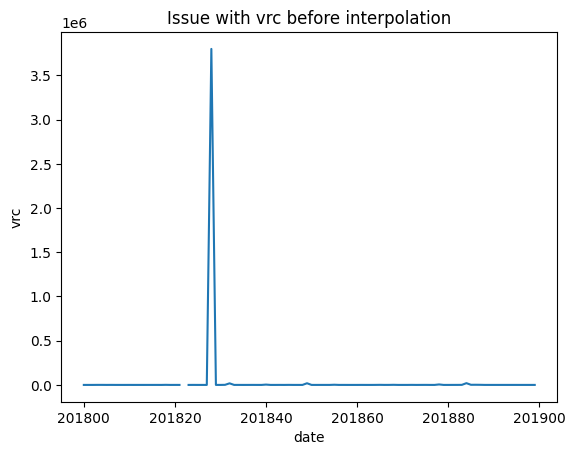

In [ ]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
data = data_inter.loc["2018-06-01":"2019-01-01"]
ax.plot(data.index, data["vrc"])
plt.title("Issue with vrc before interpolation")
plt.xlabel("date")
plt.ylabel("vrc")
plt.savefig("coef_issues", dpi=400)
plt.show()